In [3]:
%load_ext version_information
import time
now = time.strftime("%Y-%m-%d %H:%M:%S (%Z = GMT%z)")
print(f"This notebook was generated at {now} ")

vv = %version_information scipy, numpy, matplotlib, astropy, version_information
for i, pkg in enumerate(vv.packages):
    print(f"{i} {pkg[0]:10s} {pkg[1]:s}")

This notebook was generated at 2019-04-22 14:57:34 (KST = GMT+0900) 
0 Python     3.6.8 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
1 IPython    6.5.0
2 OS         Darwin 18.2.0 x86_64 i386 64bit
3 scipy      1.2.1
4 numpy      1.16.2
5 matplotlib 3.0.3
6 astropy    3.1.2
7 version_information 1.0.3


In [33]:
from pathlib import Path

import numpy as np

from matplotlib import pyplot as plt
from matplotlib import rcParams

plt.style.use('default')
rcParams.update({'font.size':12})

from astropy.io import fits

def expf(x, a, b):
    return a * np.exp(-b * x)

DATAPATH = Path("data")

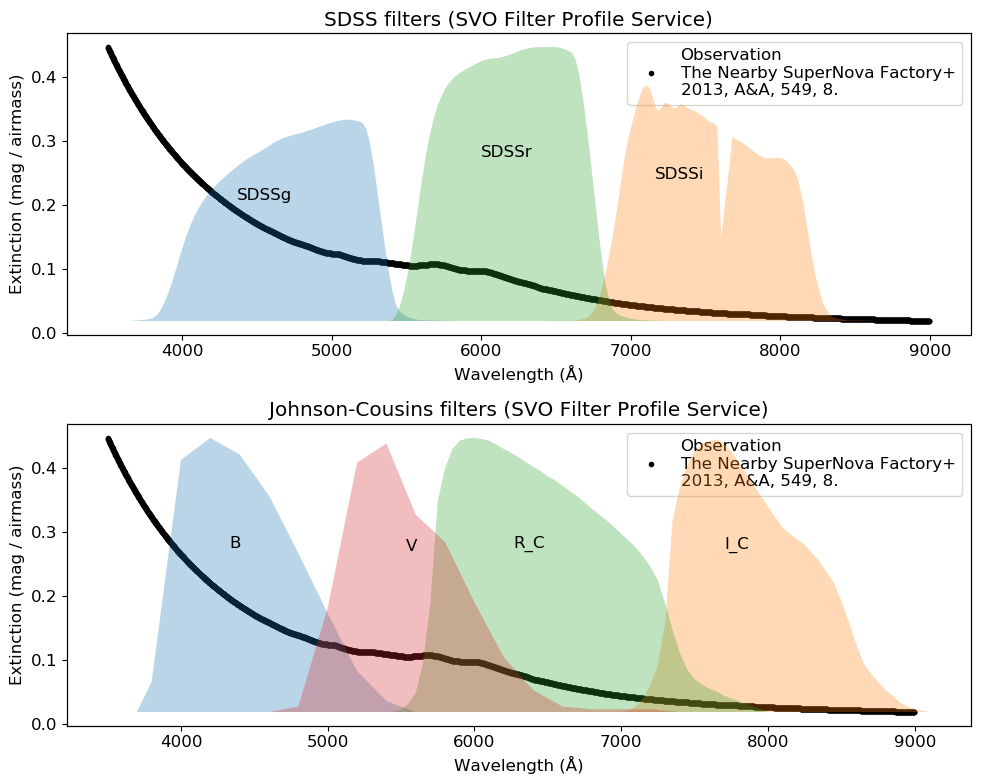

In [60]:
extdata = fits.open(DATAPATH / "SNFext.fits")

extdata[1].data = extdata[1].data[(extdata[1].data["lambda"] > 3500) & (extdata[1].data["lambda"] < 9000)]
wlen, ext = extdata[1].data["lambda"], extdata[1].data["ext"]
ww = np.linspace(3800, wlen.max(), 1000)

fig, axs = plt.subplots(2, 1, figsize=(10, 8))
twinxaxs = [axs[0].twinx(), axs[1].twinx()]
titles = ["SDSS filters (SVO Filter Profile Service)", "Johnson-Cousins filters (SVO Filter Profile Service)"]

allfilter = list(DATAPATH.glob("filter*.dat"))
allfilter.sort()
for filtpath in allfilter:
    filt = np.loadtxt(filtpath)
    filtname = filtpath.stem
    if filtname.startswith("filter_SDSS"):
        ax = twinxaxs[0]
    else:
        ax = twinxaxs[1]

    ax.fill_between(filt[:,0], filt[:,1], alpha=0.3)
    ax.text((filt[:,0].max() + 2 * filt[:,0].min()) / 3, filt[:,1].max() * 0.6, filtname.split("_", 1)[-1])
    ax.get_yaxis().set_visible(False)

for i, ax in enumerate([axs[0], axs[1]]):
    ax.plot(wlen, ext, 'k.', label="Observation\nThe Nearby SuperNova Factory+\n2013, A&A, 549, 8.")
    ax.legend()
    ax.set_xlabel(r"Wavelength (Å)")
    ax.set_ylabel("Extinction (mag / airmass)")
    ax.set_title(titles[i])

plt.tight_layout()
plt.show()

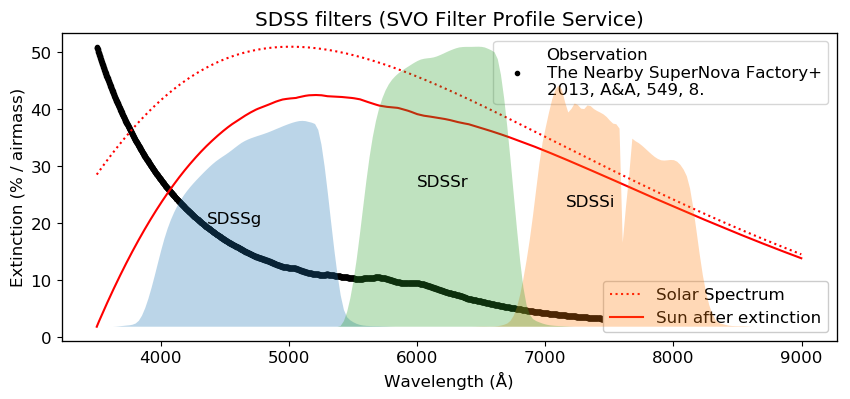

In [103]:
h = 6.62607004e-34       # Planck constant
kB = 1.38064852e-23      # Boltzman constant
c = 299792458.0          # Speed of light
sig_SB = 5.6708e-8        # Stefan-Boltzmann constant
AA = 1.e-10              # Ångstrom unit
HCK = h * c / kB

def b_lam(lam, T):
    return 2 * h * c**2 / lam**5 * 1 / (np.exp(h * c / (lam * kB * T)) - 1) / (sig_SB * T**4)

ww = np.linspace(3800, 9000, 1000)
ext_frac = 100 * (10**(0.4 * ext) - 1)  # How much % of income light is extincted.

b_sun = b_lam(wlen * AA, 5777)

fig, axs = plt.subplots(1, 1, figsize=(10, 4))
axs.plot(wlen, ext_frac, 'k.', label="Observation\nThe Nearby SuperNova Factory+\n2013, A&A, 549, 8.")

twinxax = axs.twinx()
twinxax.get_yaxis().set_visible(False)
twinxax.plot(wlen, b_sun, 'r:', label="Solar Spectrum")
twinxax.plot(wlen, (1 - ext_frac / 100) * b_sun, 'r-', label="Sun after extinction")
twinxax.legend(loc=4, framealpha=1)

axs.legend()
axs.set_xlabel(r"Wavelength (Å)")
axs.set_ylabel("Extinction (% / airmass)")
axs.set_title(titles[0])

allfilter = list(DATAPATH.glob("filter*.dat"))
allfilter.sort()
twinxax2 = axs.twinx()

for filtpath in allfilter:
    filt = np.loadtxt(filtpath)
    filtname = filtpath.stem
    if not filtname.startswith("filter_SDSS"):
        continue
    twinxax2.fill_between(filt[:,0], filt[:,1], alpha=0.3)
    twinxax2.text((filt[:,0].max() + 2 * filt[:,0].min()) / 3, filt[:,1].max() * 0.5, filtname.split("_", 1)[-1])
    twinxax2.get_yaxis().set_visible(False)
